
# **Electric Vehicle (EV) Dataset Analysis**

## **Objective**
The objective of this analysis is to explore and derive insights from an Electric Vehicle (EV) dataset. We will focus on identifying key trends in EV production, analyzing the characteristics of the vehicles, and visualizing how different EV makes have evolved over time. Additionally, we will employ a variety of visualizations to gain a deeper understanding of the dataset, concluding with a racing bar plot to animate the count of EV makes by year.

## **1. Importing Libraries**


In [1]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

## **2. Loading the Dataset**


In [2]:
df = pd.read_csv('evdata.csv')

## **3. Initial Data Inspection**

In [3]:
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.describe()


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


### **Key Insights:**
- **Total records**: Inspect the total number of rows and columns to understand the dataset size.
- **Data types**: Check if any columns need type conversion (e.g., converting numerical columns stored as strings).
- **Summary statistics**: The `.describe()` function helps to summarize key statistics like mean, standard deviation, etc.

# Exploratory Data Analysis

* Handling Missing values.
* Checking Duplicated values.
* Looking for Outliers.
* Identifying Relationships.
* Finding Distributions.


## **Handling Missing Values**




In [6]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

### **Insights**

* There are missing values in columns Model, Legislative District, 2020 Census tract


## **Handling Missing Data:**


In [7]:
Missing_columns=["Model","Legislative District","2020 Census Tract"]
SIM=SimpleImputer(strategy="most_frequent")
SIM

SimpleImputer(strategy='most_frequent')

In [8]:
df[["Model"]]=SIM.fit_transform(df[["Model"]])
df["Model"].isna().sum()


np.int64(0)

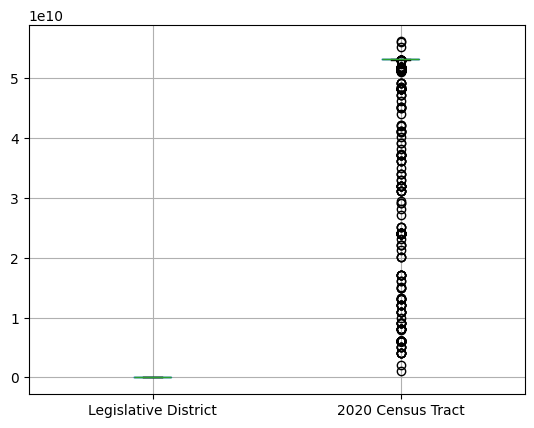

In [9]:
df[["Legislative District","2020 Census Tract"]].boxplot()
plt.show()

In [10]:
SIM=SimpleImputer(strategy="mean")
df[["2020 Census Tract"]]=SIM.fit_transform(df[["2020 Census Tract"]])
df["2020 Census Tract"].isna().sum()


np.int64(0)

In [11]:
SIM=SimpleImputer(strategy="median")
df[["Legislative District"]]=SIM.fit_transform(df[["Legislative District"]])
df["Legislative District"].isna().sum()

np.int64(0)

## **Identifying Outliers**

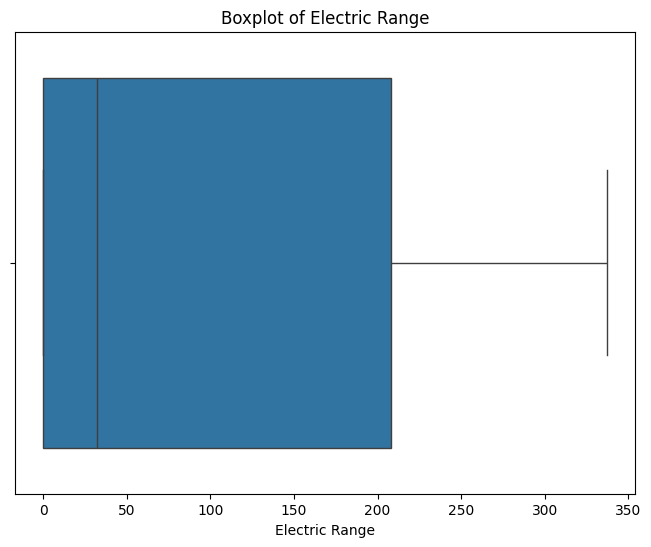

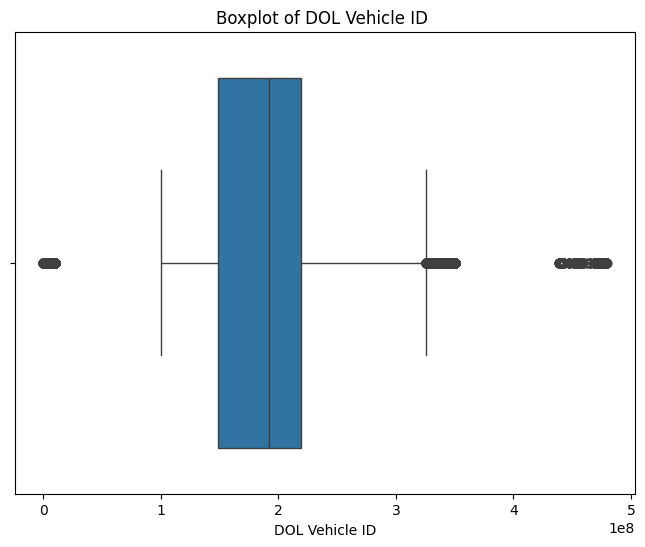

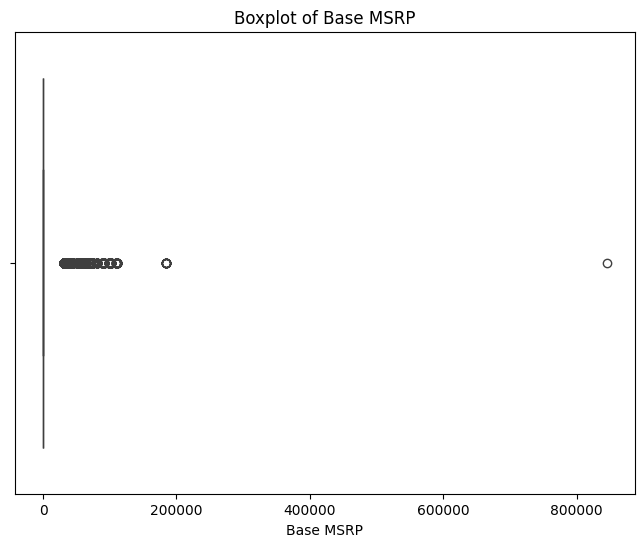

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Electric Range"])
plt.title("Boxplot of Electric Range")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df["DOL Vehicle ID"])
plt.title("Boxplot of DOL Vehicle ID ")
plt.show

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Base MSRP"])
plt.title("Boxplot of Base MSRP")
plt.show()

## **Data Preprocessing**

- Convert relevant columns to appropriate data types.
- Ensure no anomalies are present in categorical data.


In [13]:
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Make'] = df['Make'].astype(str)

## **Distribution of Model Years**
Visualizing the distribution of `Model Year` to understand how EV production has evolved over time.



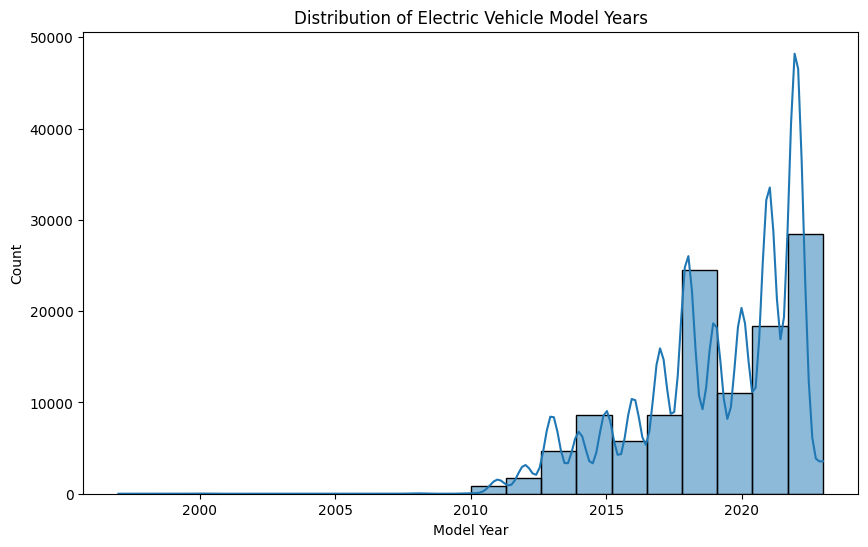

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Model Year'], kde=True, bins=20)
plt.title('Distribution of Electric Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

### **Insight**:
- This plot helps to identify the concentration of EV production across different years. A spike in more recent years may indicate an increased interest in electric vehicles.


## **Distribution of City**

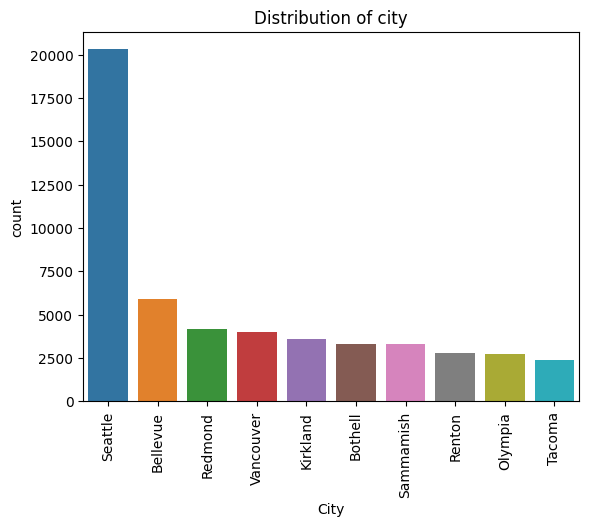

In [15]:
city = pd.DataFrame(df["City"].value_counts())
sns.barplot(x=city.index[:10],y=city["count"][:10],hue=city.index[:10])
plt.title("Distribution of city")
plt.xticks(rotation=90)
plt.show()

### **Insights**

Seattle has shown more disrtibution than other cities while Worley is least among them

## **Distribution of State**

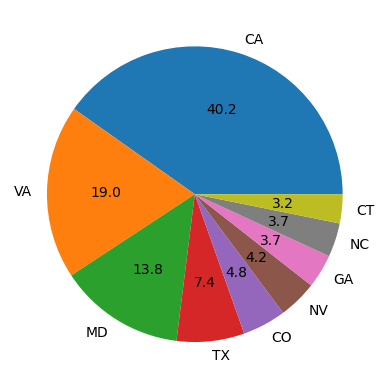

In [16]:
state=pd.DataFrame(df["State"].value_counts())
plt.pie(x=state["count"][1:10],labels=state.index[1:10],autopct="%0.1f")
plt.show()


## **Top 10 EV Manufacturers by Count**
We'll analyze the top 10 manufacturers with the highest number of electric vehicles.



C:\Users\jaypa\AppData\Local\Temp\ipykernel_23752\2877860957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')


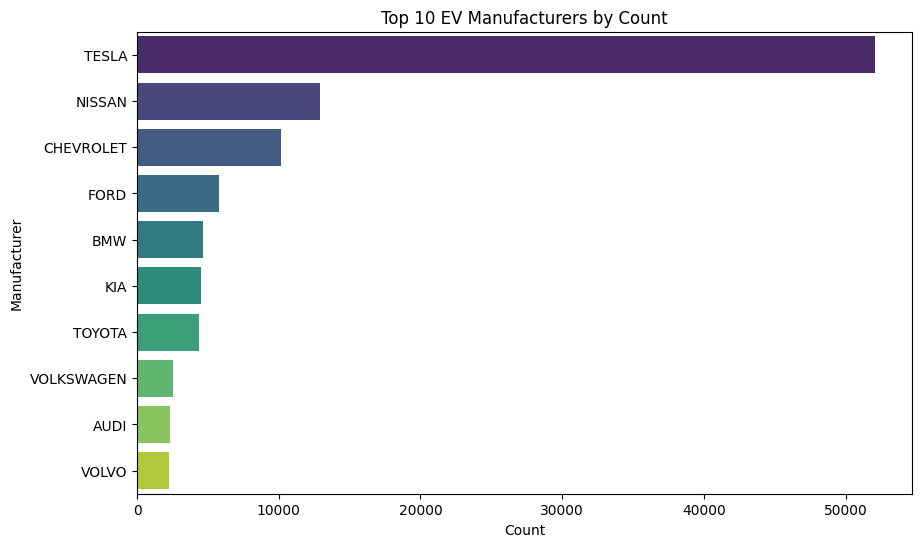

In [17]:

top_makes = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top 10 EV Manufacturers by Count')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

### **Insight**:
- **Tesla**: Likely to dominate the EV market based on its reputation.
- **Other players**: Identify other significant contributors like Nissan and Chevrolet.


## **Vehicle Class Distribution**
Analyzing the different types of vehicle classes present in the dataset.



C:\Users\jaypa\AppData\Local\Temp\ipykernel_23752\421044024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Electric Vehicle Type'], order=df['Electric Vehicle Type'].value_counts().index, palette='coolwarm')


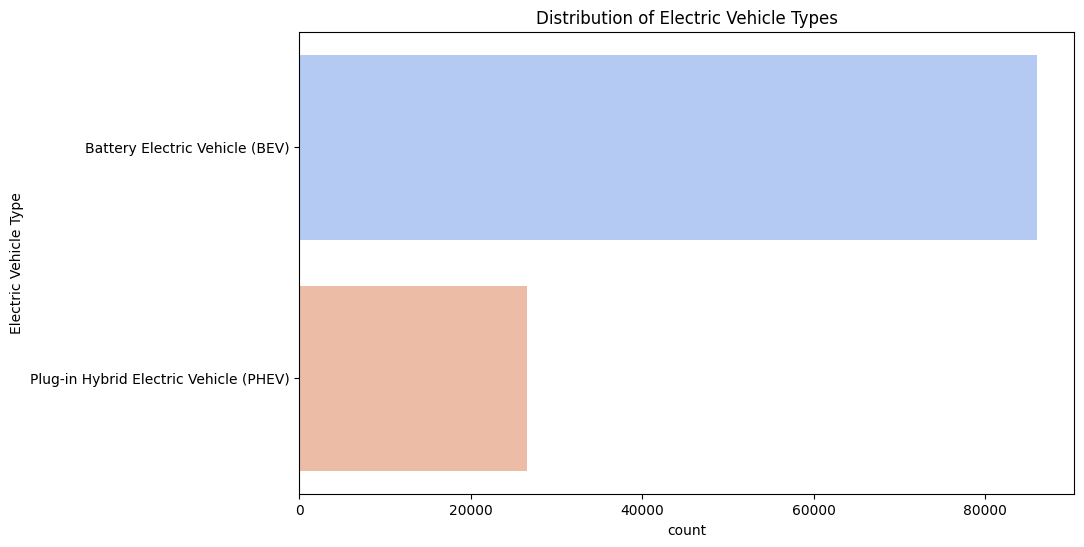

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Electric Vehicle Type'], order=df['Electric Vehicle Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Electric Vehicle Types')
plt.show()



### **Insight**:
Understanding the distribution of electric vehicle types is crucial, as it gives us an overview of the adoption rates of fully electric vehicles (BEV) versus plug-in hybrids (PHEV). This can provide insights into market trends and preferences.



## **Electric Range Distribution**
Analyzing the distribution of electric ranges across different vehicles in the dataset can give us insights into the capabilities of various electric vehicles (EVs) and plug-in hybrid electric vehicles (PHEVs).


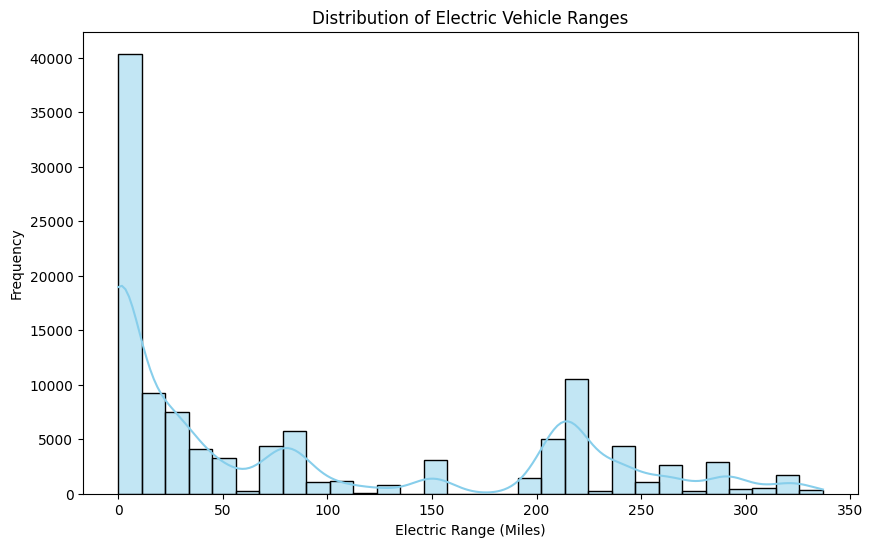

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Frequency')
plt.show()


### **Insight**:
The distribution of electric ranges helps us understand the range capabilities of electric vehicles on the market. A higher frequency of certain ranges may suggest popular models or typical battery capacity for different vehicle types.


## **Battery Capacity vs. Electric Range**
Although we don't have the exact battery capacity data, we can still explore the relationship between **Electric Vehicle Type** and **Electric Range** to understand how different types of electric vehicles perform.

C:\Users\jaypa\AppData\Local\Temp\ipykernel_23752\1789322266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set3')


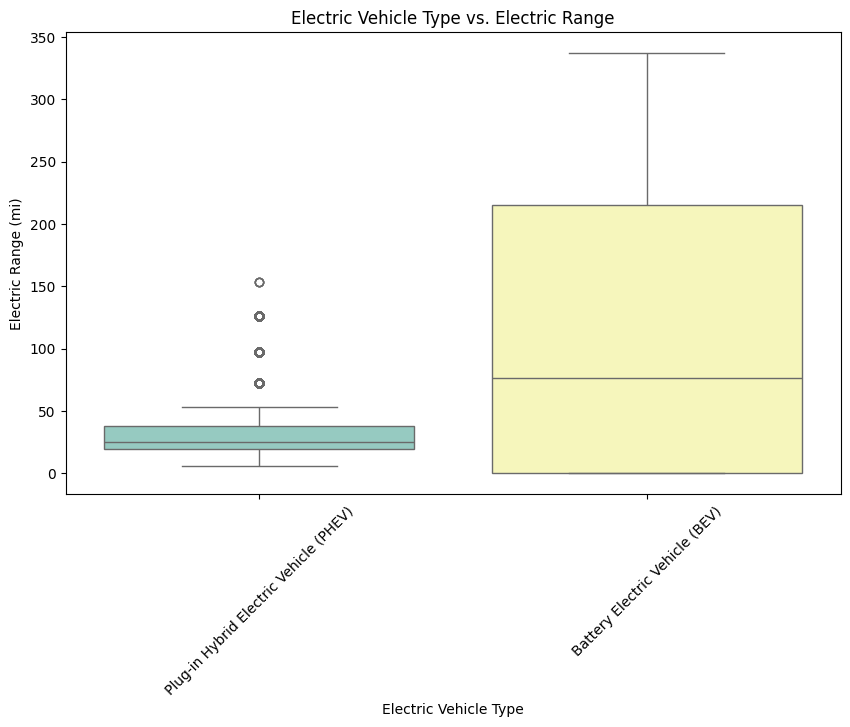

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set3')
plt.title('Electric Vehicle Type vs. Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (mi)')
plt.xticks(rotation=45)
plt.show()

### **Insight**:
- This box plot allows us to compare the electric ranges of different vehicle types, such as **Battery Electric Vehicles (BEVs)** and **Plug-in Hybrid Electric Vehicles (PHEVs)**. 
- We might observe that **BEVs** generally have a longer electric range compared to **PHEVs**, reflecting their design for full electric operation.


## **Trends in Electric Vehicle Range Over Time**


C:\Users\jaypa\AppData\Local\Temp\ipykernel_23752\2409949016.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Electric Range', data=df, ci=None)


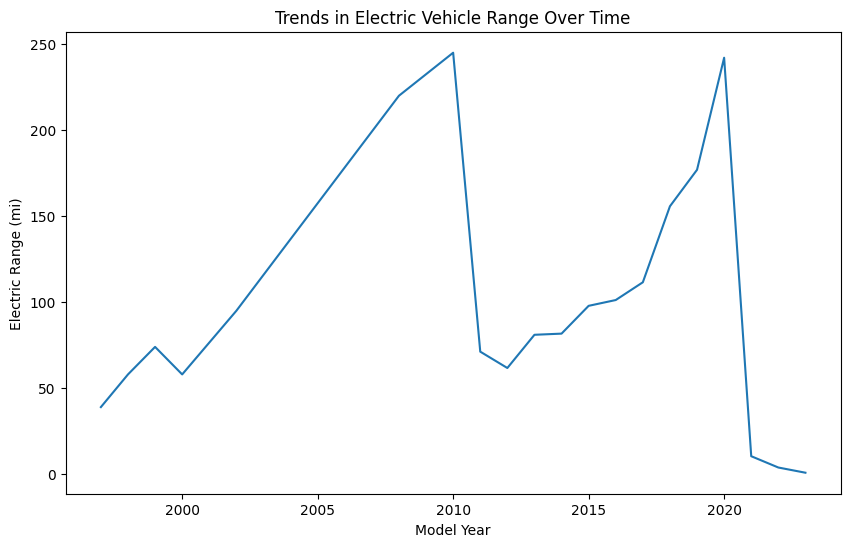

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Model Year', y='Electric Range', data=df, ci=None)
plt.title('Trends in Electric Vehicle Range Over Time')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (mi)')
plt.show()

### **Insight**:
- **Trend**: Likely an increasing trend as battery technologies improve and manufacturers aim to extend vehicle range.
- **Recent years**: Newer models may demonstrate significant improvements in range, reflecting advancements in battery efficiency.


## **EV Make Count by Year (Stacked Bar Plot)**


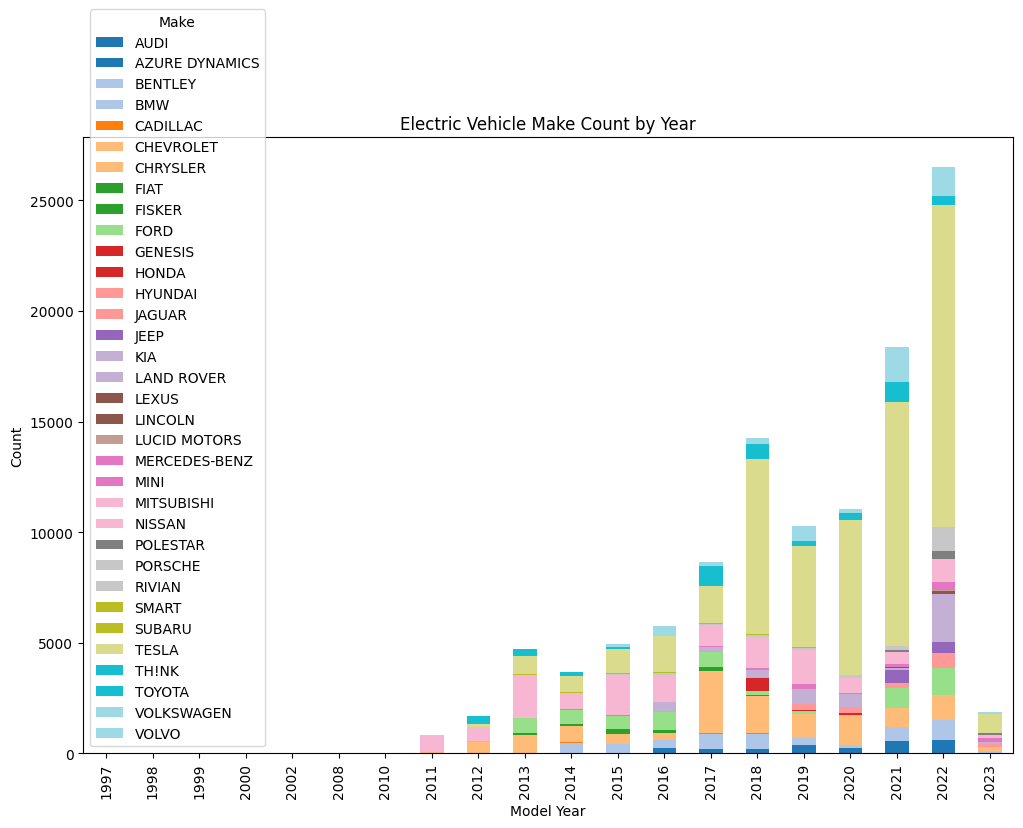

In [22]:
make_year_counts = df.groupby(['Model Year', 'Make']).size().unstack().fillna(0)

make_year_counts.plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Electric Vehicle Make Count by Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

### **Insight**:
- **Growth trend**: The number of EV models introduced by different manufacturers over time can indicate market growth.
- **Manufacturer competition**: Analyze which manufacturers consistently produce EVs year after year.


## **Relationship b/w Electric Range & Base MSRP of EV?**

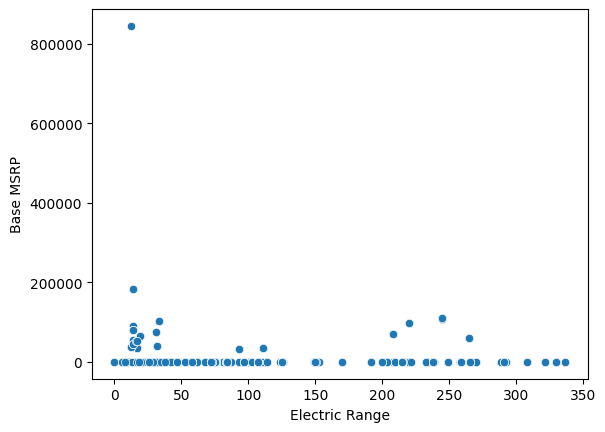

In [23]:
df[["Electric Range","Base MSRP"]].corr()
sns.scatterplot(x=df["Electric Range"],y=df["Base MSRP"])
plt.show()

### **Insights**

The correlation is so minimal, From this we can analyze that Electric Range is not optimal for predcting the Base MSRP 

## **State with more Battery type vehicles?**

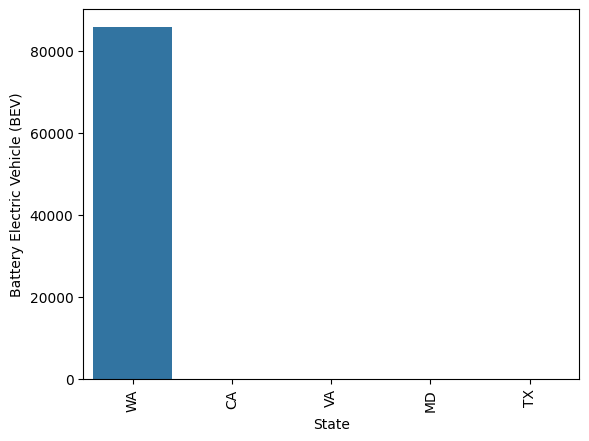

In [24]:
state=pd.crosstab(index=df["State"],columns=df["Electric Vehicle Type"]).sort_values(by=["Battery Electric Vehicle (BEV)","Plug-in Hybrid Electric Vehicle (PHEV)"],ascending=False)
sns.barplot(x=state.index[:5],y=state["Battery Electric Vehicle (BEV)"][:5],hue=state.index[:5])
plt.xticks(rotation=90)
plt.show()

## **State with least plug-in-hybrid electric**

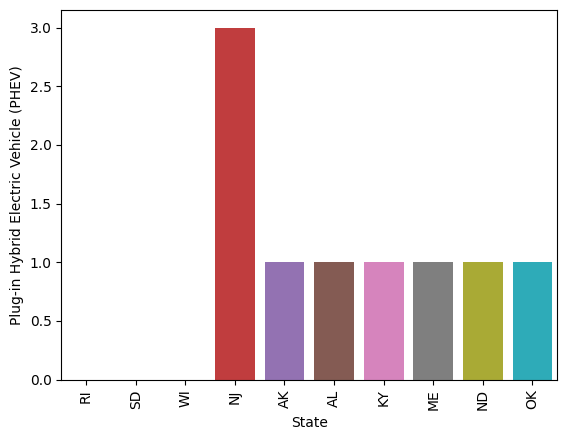

In [25]:
sns.barplot(x=state.index[35:45],y=state["Plug-in Hybrid Electric Vehicle (PHEV)"][35:45],hue=state.index[35:45])
plt.xticks(rotation=90)
plt.show()

## **Choropleth Map**

In [26]:
state_data = df.groupby('State')['VIN (1-10)'].count().reset_index()
state_data.columns = ['State', 'EV Count']

fig = px.choropleth(state_data, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='EV Count', 
                    color_continuous_scale='greens', 
                    scope='usa',
                    labels={'EV Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State')

fig.show()

## **Racing Bar Plot for EV Make Count Each Year**

An animated racing bar plot to show how the count of EVs for each make evolves over time.


1. **Prepare the Data**:
   We group the dataset by `Model Year` and `Make`, counting the number of vehicles produced by each manufacturer per year.


In [27]:
ev_make_by_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

unique_makes = df['Make'].unique()

all_years = pd.DataFrame({'Model Year': sorted(df['Model Year'].unique())})
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key':1}), on='key').drop('key', axis=1)
ev_make_by_year_full = all_combinations.merge(ev_make_by_year, on=['Model Year', 'Make'], how='left').fillna(0)

ev_make_by_year_full['EV Count'] = ev_make_by_year_full['EV Count'].astype(int)



2. **Create the Animated Bar Plot**:
   Using `plotly.express`, we will create an animated racing bar plot.


In [28]:
fig = px.bar(
    ev_make_by_year_full,  # Data
    x='EV Count',  # X-axis shows the count of EVs
    y='Make',  # Y-axis shows the car Make
    color='Make',  # Color by car Make
    animation_frame='Model Year',  # Animation by year
    orientation='h',  # Horizontal bar chart
    title='Electric Vehicle Makes Over the Years',
    labels={'EV Count':'Number of EVs', 'Make':'Car Make'},  # Axis labels
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],  # Dynamically set x-axis range
    height=800  # Increased height for better visibility
)


fig.show()